## Human Or Human Classification using CNN

In [2]:
import keras 
import matplotlib.pyplot as plt

from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator

from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2

## Load Data

In [3]:
train_data_path = '/content/drive/My Drive/horse-or-human/train'
validation_data_path = '/content/drive/My Drive/horse-or-human/validation'


## Data Pre-Processing

In [4]:
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

In [5]:
training_data =  training_datagen.flow_from_directory(train_data_path, 
                                      target_size=(150, 150), 
                                      batch_size=32,
                                      class_mode='binary')

Found 1027 images belonging to 2 classes.


In [6]:
training_data.class_indices

valid_datagen = ImageDataGenerator(rescale=1./255)

valid_data =  valid_datagen.flow_from_directory(validation_data_path, 
                                      target_size=(150, 150), 
                                      batch_size=32,
                                      class_mode='binary')

Found 256 images belonging to 2 classes.


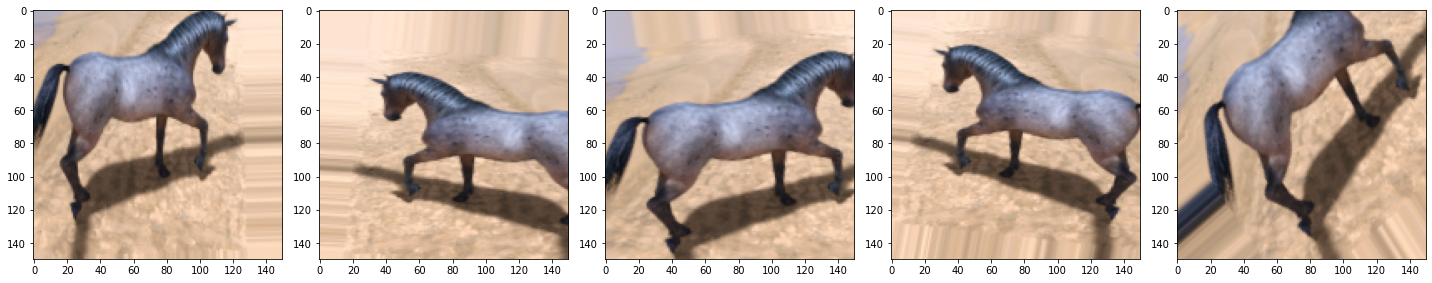

In [7]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

images = [training_data[0][0][0] for i in range(5)]
plotImages(images)    

In [8]:
#Building cnn model
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=7, input_shape=[150, 150, 3],kernel_regularizer=l2(l=0.01)),
                                    BatchNormalization(),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                      
                                    keras.layers.Conv2D(filters=64, kernel_size=5),
                                    BatchNormalization(),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                      
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    BatchNormalization(),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                                                          
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    BatchNormalization(),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                                                      
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    BatchNormalization(),
                                    keras.layers.Dropout(0.5),                                      
                                    keras.layers.Dense(units=256, activation='relu'),  
                                    BatchNormalization(),                                  
                                    keras.layers.Dropout(0.5),                                    
                                    keras.layers.Dense(units=2, activation='softmax') # output layer
])

In [9]:
# compile cnn model
cnn_model.compile(optimizer = Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
model_path = '/content/drive/My Drive/horse-or-human/horse_or_human_predictor.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [11]:
# train cnn model
history = cnn_model.fit(training_data, 
                          epochs=100, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list)

Epoch 1/100
33/33 [==============================] - ETA: 0s - loss: 1.0250 - accuracy: 0.6495 
Epoch 00001: val_accuracy improved from -inf to 0.51172, saving model to /content/drive/My Drive/horse-or-human/horse_or_human_predictor.h5
33/33 [==============================] - 994s 30s/step - loss: 1.0250 - accuracy: 0.6495 - val_loss: 0.7685 - val_accuracy: 0.5117
Epoch 2/100
33/33 [==============================] - ETA: 0s - loss: 0.8298 - accuracy: 0.7147
Epoch 00002: val_accuracy did not improve from 0.51172
33/33 [==============================] - 105s 3s/step - loss: 0.8298 - accuracy: 0.7147 - val_loss: 1.2285 - val_accuracy: 0.5000
Epoch 3/100
33/33 [==============================] - ETA: 0s - loss: 0.6668 - accuracy: 0.7624
Epoch 00003: val_accuracy did not improve from 0.51172
33/33 [==============================] - 101s 3s/step - loss: 0.6668 - accuracy: 0.7624 - val_loss: 1.6841 - val_accuracy: 0.5000
Epoch 4/100
33/33 [==============================] - ETA: 0s - loss: 0.61

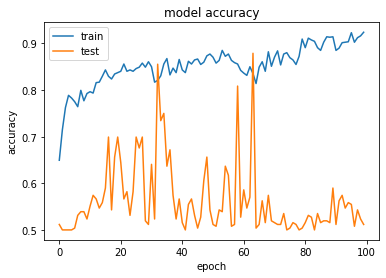

In [12]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

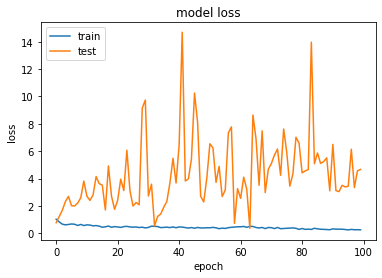

In [13]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()